# D3 Presents: Data Viz with Python
### Marifel Barbasa | Brock Lanoza | Alex Anich | Kawika Kekahuna
* * * 

<div style="text-align: center;">
    <img 
      src=https://static.festisite.com/static/partylogo/img/logos/nasa.png 
      style="display: inline-block; margin-right: 100px;"
      width="250px" 
      height="auto" 
    />
    <img 
      src=http://datarave.github.io/20141021/20141021_Chris_Ryan_Transitioning_to_a_Data_Science_Career/logo-python.png 
      style="display: inline-block; margin-right: 100px;" 
      width="250px" 
      height="auto" 
    />
</div>

## What is this?
* * *

This is a **Jupyter Notebook!** It's an interactive web application that allows you to create documents with inline code snippets. If you don't have it already, install it [here](http://jupyter.org/install.html).

**NOTE:** The above link also includes the necessary steps for installing [Anaconda](https://www.continuum.io/downloads), a distribution that includes all of the most popular packages for dealing with data in Python!

## Ok...so what are we gonna do with it?
* * * 
We're going to walk through some cool ways to bring data to life. Looking at a spreadsheet is _boring_...so let's make some graphs!

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is only necessary when using matplotlib in a notebook.
# This means that graphs will display inline, without having to call `plt.show()`.
%matplotlib inline

## Read in the data

The dataset we'll be using is already in the repo. If you'd like to see the source along with a bunch of other cool datasets, [check this out](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/data)!

In [3]:
# Using the pandas read_csv function
data = pd.read_csv('nasa_meteorite_data.csv')

## What is a DataFrame?

"A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object."

In [4]:
# Check the first few rows to get a peek at the data
data.head()

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Fell,1976-01-01 00:00:00,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Fell,1902-01-01 00:00:00,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [5]:
# You can pass in a number to specify the first few number of rows
data.head(3)

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)"


## A few other ways to check out the data frame...

In [6]:
# The opposite of head
data.tail()

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
45711,Zillah 002,31356.0,Valid,Eucrite,172.0,Found,1990-01-01 00:00:00,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409.0,Valid,"Pallasite, ungrouped",46.0,Found,1999-01-01 00:00:00,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410.0,Valid,H4,3.3,Found,1939-01-01 00:00:00,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357.0,Valid,L6,2167.0,Found,2003-01-01 00:00:00,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414.0,Valid,L3.7,200.0,Found,1976-01-01 00:00:00,33.98333,-115.68333,"(33.983330, -115.683330)"


In [7]:
# See the data types and how many rows there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name            45716 non-null object
id              45716 non-null float64
nametype        45716 non-null object
recclass        45716 non-null object
mass_g          45585 non-null float64
fall            45716 non-null object
year            45428 non-null object
reclat          38401 non-null float64
reclong         38401 non-null float64
geo_location    38401 non-null object
dtypes: float64(4), object(6)
memory usage: 3.5+ MB


In [8]:
# View the most common stats about your dataset (only provides stats for numeric type columns)
# count = how many non-null values there are for that column
# mean = the mean for that column
# std = the standard deviation for that column
# min = the minimum value for that column
# 25%, 50%, 75% = the lower, median, and upper percentiles for that column
# max = the maximum value for that column
data.describe()

,id,mass_g,reclat,reclong
count,45716.000000,4.558500e+04,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,-39.122580,61.074319
std,16860.683030,5.749889e+05,46.378511,80.647298
min,1.000000,0.000000e+00,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,-76.714240,0.000000
50%,24261.500000,3.260000e+01,-71.500000,35.666670
75%,40656.750000,2.026000e+02,0.000000,157.166670
max,57458.000000,6.000000e+07,81.166670,354.473330


## Finding important figures in the data

### Using DataFrame built-in functions

In [9]:
# Let's find the top 7 largest meteorites
# `sort_values()` returns the entire data frame, but we just need the first few rows
data.sort_values('mass_g',ascending=False).head(7)

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
16383,Hoba,11890.0,Valid,"Iron, IVB",60000000.0,Found,1920-01-01 00:00:00,-19.58333,17.91667,"(-19.583330, 17.916670)"
5336,Cape York,5262.0,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01 00:00:00,76.13333,-64.93333,"(76.133330, -64.933330)"
5329,Campo del Cielo,5247.0,Valid,"Iron, IAB-MG",50000000.0,Found,1576-01-01 00:00:00,-27.46667,-60.58333,"(-27.466670, -60.583330)"
5333,Canyon Diablo,5257.0,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01 00:00:00,35.05000,-111.03333,"(35.050000, -111.033330)"
3433,Armanty,2335.0,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01 00:00:00,47.00000,88.00000,"(47.000000, 88.000000)"
12600,Gibeon,10912.0,Valid,"Iron, IVA",26000000.0,Found,1836-01-01 00:00:00,-25.50000,18.00000,"(-25.500000, 18.000000)"
5431,Chupaderos,5363.0,Valid,"Iron, IIIAB",24300000.0,Found,1852-01-01 00:00:00,27.00000,-105.10000,"(27.000000, -105.100000)"


### By querying the DataFrame

In [10]:
# Let's find the largest meteorite that "fell" or was witnessed falling

In [11]:
# While we could query the `fall` column itself, we still need the `mass_g` column.
# Here, passing in a string between the DataFrame brackets gives us a Series (a DataFrame column).
data['fall'].head()

0    Fell
1    Fell
2    Fell
3    Fell
4    Fell
Name: fall, dtype: object

In [12]:
# We could also query whether or not each row in a Series passes a certain condition.
# Here, we can simply place a Series on one side of a conditional statement.
# In this case, we're checking to see which rows equate to 'Fell'.
data['fall'] == 'Fell'

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
45686    False
45687    False
45688    False
45689    False
45690    False
45691    False
45692    False
45693    False
45694    False
45695    False
45696    False
45697    False
45698    False
45699    False
45700    False
45701    False
45702    False
45703    False
45704    False
45705    False
45706    False
45707    False
45708    False
45709    False
45710    False
45711    False
45712    False
45713    False
45714    False
45715    False
Name: fall, dtype: bool

In [13]:
# While that's pretty neat, we still need information from other columns.
# To retrieve the original rows, we can pass the conditional Series above into the DataFrame brackets.
data[data['fall'] == 'Fell']

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Fell,1976-01-01 00:00:00,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Fell,1902-01-01 00:00:00,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379.0,Valid,EH4,4239.0,Fell,1919-01-01 00:00:00,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390.0,Valid,LL3-6,910.0,Fell,1949-01-01 00:00:00,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392.0,Valid,H5,30000.0,Fell,1814-01-01 00:00:00,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398.0,Valid,L6,1620.0,Fell,1930-01-01 00:00:00,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417.0,Valid,L,1440.0,Fell,1920-01-01 00:00:00,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [14]:
# Now that we have all of the 'Fell' rows, we can use the DataFrame `sort_values()` function.
data[data['fall'] == 'Fell'].sort_values('mass_g', ascending=False)

# Cool, now we have our largest meteorite at the top of the list!  But we don't need the entire list.

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
916,Sikhote-Alin,23593.0,Valid,"Iron, IIAB",23000000.0,Fell,1947-01-01 00:00:00,46.16000,134.65333,"(46.160000, 134.653330)"
419,Jilin,12171.0,Valid,H5,4000000.0,Fell,1976-01-01 00:00:00,44.05000,126.16667,"(44.050000, 126.166670)"
29,Allende,2278.0,Valid,CV3,2000000.0,Fell,1969-01-01 00:00:00,26.96667,-105.31667,"(26.966670, -105.316670)"
706,Norton County,17922.0,Valid,Aubrite,1100000.0,Fell,1948-01-01 00:00:00,39.68333,-99.86667,"(39.683330, -99.866670)"
506,Kunya-Urgench,12379.0,Valid,H5,1100000.0,Fell,1998-01-01 00:00:00,42.25000,59.20000,"(42.250000, 59.200000)"
418,Jianshi,12087.0,Valid,"Iron, IIIAB",600000.0,Fell,1890-01-01 00:00:00,30.80833,109.50000,"(30.808330, 109.500000)"
490,Knyahinya,12335.0,Valid,L/LL5,500000.0,Fell,1866-01-01 00:00:00,48.90000,22.40000,"(48.900000, 22.400000)"
717,Ochansk,17979.0,Valid,H4,500000.0,Fell,1887-01-01 00:00:00,57.78333,55.26667,"(57.783330, 55.266670)"
758,Paragould,18101.0,Valid,LL5,408000.0,Fell,1930-01-01 00:00:00,36.06667,-90.50000,"(36.066670, -90.500000)"
624,Millbillillie,16643.0,Valid,Eucrite-mmict,330000.0,Fell,1960-01-01 00:00:00,-26.45000,120.36667,"(-26.450000, 120.366670)"


In [15]:
# Return the largest meteorite that "fell" or was witnessed falling.
# We can query the row at a given index using DataFrame's `iloc[index]`.
fell_meteorites = data[data['fall'] == 'Fell'].sort_values('mass_g', ascending=False)
fell_meteorites.iloc[0]

name                       Sikhote-Alin
id                                23593
nametype                          Valid
recclass                     Iron, IIAB
mass_g                          2.3e+07
fall                               Fell
year                1947-01-01 00:00:00
reclat                            46.16
reclong                         134.653
geo_location    (46.160000, 134.653330)
Name: 916, dtype: object

## Graphs!

### Number of meteorites over the years 

In [16]:
# We can create a new column (Series) called 'new_column' and assign it a default value
data['new_column'] = True
data.head(3)

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location,new_column
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)",True
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)",True
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)",True


In [17]:
# We can delete a column and modify the same data frame (`inplace=True`) with the following
data.drop('new_column', axis=1, inplace=True)
data.head(3)

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)"


In [18]:
# Back to the task, let's find the number of meteorites over the years.

# Get the year from the date string.
def get_year(full_date):
    if type(full_date) == str:
        year = full_date.split('-')[0]
        return int(year)
    else:
        return False

# Here, we're creating a new column called 'year_only' and 
#   executing the function on each row of data in the 'year' column.
data['year_only'] = data['year'].apply(lambda x: get_year(x))

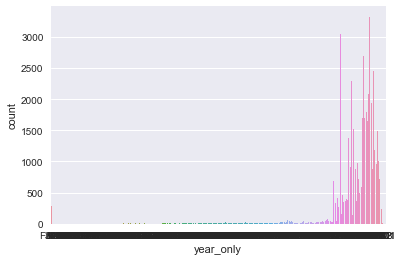

In [19]:
# Now let's use Seaborn to visualize the number of meteorites over the years!
count_graph = sns.countplot(x='year_only', data=data)

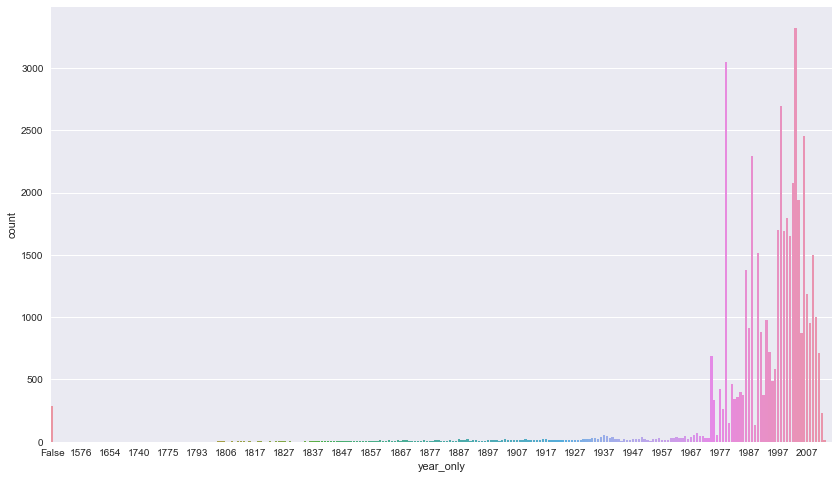

In [20]:
# Awesome, in just one line of code, we were able to create a graph!
# But it's a bit too small and extremely difficult to read the x-axis labels.

# So let's use `plt.figure()` to adjust the size; this must be called before the graph is created.
plt.figure(figsize=(14,8))
count_graph = sns.countplot(x='year_only', data=data)

# And to make the x-axis labels more legible, let's only show every 10 labels.
# Note: We need the built-in Python function `enumerate()` to retrieve the index.
for idx, label in enumerate(count_graph.get_xticklabels()):
    if idx % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [21]:
# Since we'll need it again soon, let's create a function for the code to clean up the x-axis labels
def generate_xaxis(graph, interval):
    for idx, label in enumerate(graph.get_xticklabels()):
        if idx % interval == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

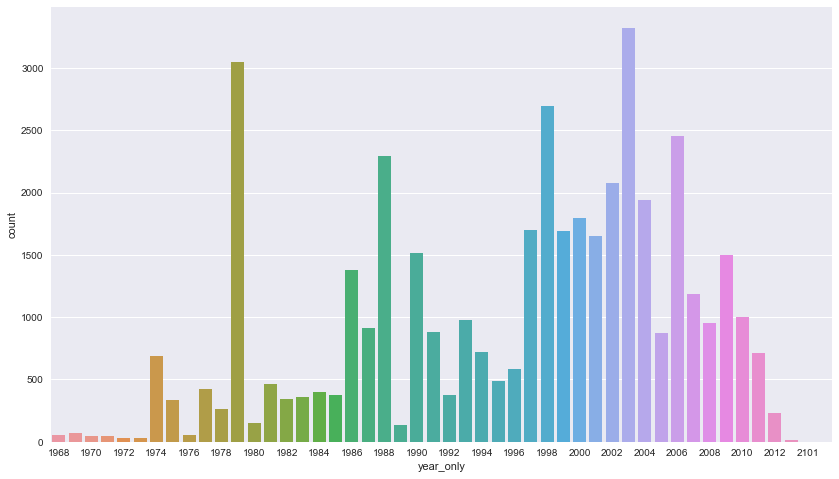

In [22]:
# Now what if we want to zoom in on the data after the year 1967?

# We can pass a conditional to the data frame!
after_1967 = data['year_only'] > 1967

# Recreate the graph with the filtered set of data.
plt.figure(figsize=(14,8))
count_graph = sns.countplot(x='year_only', data=data[after_1967])

# Call the function to clean up the x-axis labels, and since 
#   there are less data points, let's set the interval to 2.
generate_xaxis(count_graph, 2)

In [23]:
# Seems like the year 2003 had the most number of meteorites that were found or observed!

# Let's verify this with the pandas Series function `value_counts()`.
# This function finds all distinct values and returns a count per value; the highest count is first.
data['year_only'].value_counts().head()

# We can see that the year 2003 is at the top of the list with over 3000 meteorites.
# This aligns with our graph above!

2003    3323
1979    3046
1998    2697
2006    2456
1988    2296
Name: year_only, dtype: int64

### Average mass of meteorites over the years

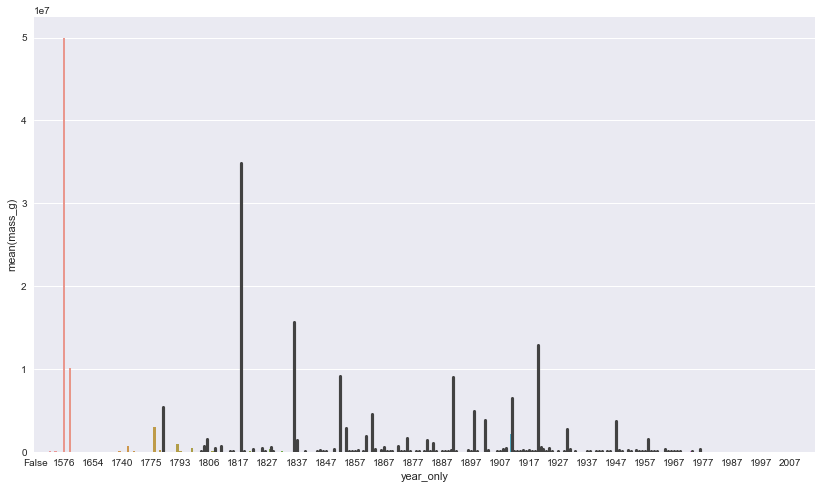

In [24]:
# Same deal, but now we're using `sns.barplot()`
plt.figure(figsize=(14,8))
mass_graph = sns.barplot(x='year_only',y='mass_g',data=data)
generate_xaxis(mass_graph, 10)

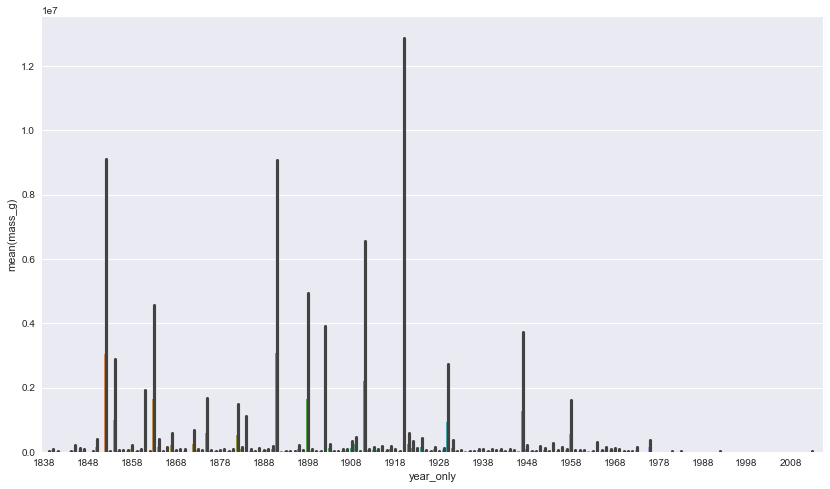

In [25]:
# Now let's zoom in on the data after the year 1837
plt.figure(figsize=(14,8))
after_1837 = data['year_only'] > 1837

mass_graph = sns.barplot(x='year_only',y='mass_g',data=data[after_1837])
generate_xaxis(mass_graph, 10)

### Number of meteorites that were observed (fell) or found over the years

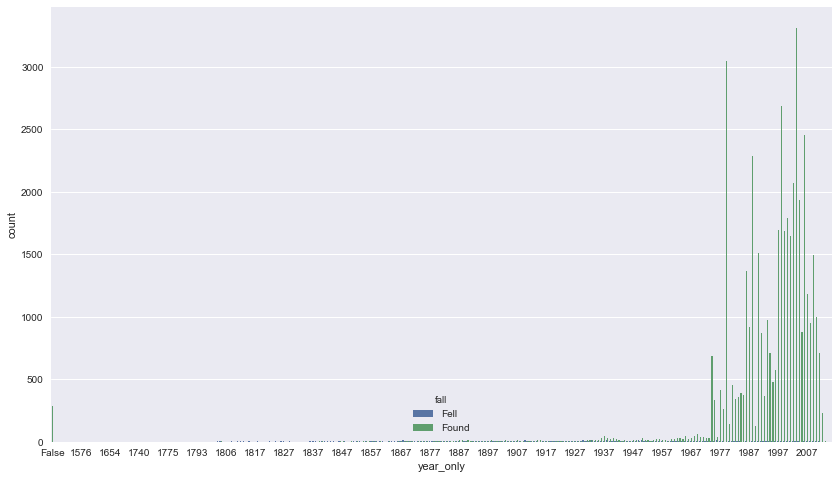

In [26]:
# Let's use `sns.countplot()` to visualize this
plt.figure(figsize=(14,8))
fell_found_graph = sns.countplot(x='year_only', hue='fall', data=data)
generate_xaxis(fell_found_graph, 10)

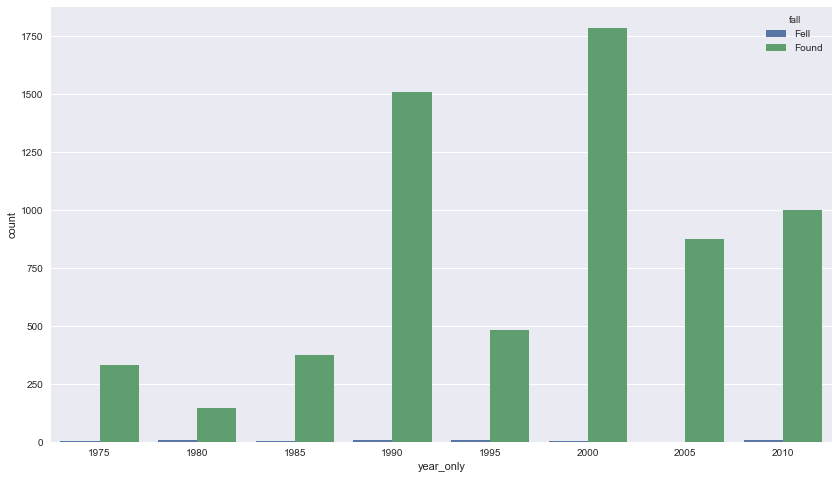

In [27]:
# That's great and all, but it's rather difficult to compare the fell and found bars.
plt.figure(figsize=(14,8))

# Only show data points every 5 years and after the year 1970.
every_5_years = data['year_only'] % 5 == 0
after_1970 = data['year_only'] > 1970

# Recreate the graph with the filtered set of data.
fell_found_graph = sns.countplot(
    x='year_only', 
    hue='fall',
    data=data[every_5_years & after_1970]
)
# No need to call `generate_xaxis()` here, since the labels are spaced out enough already.

# The result is a much cleaner graph that clearly displays the difference between
#   the number of meteorites that fell vs. those that were found per year.

### Meteorite scatter plot on Mapbox map

In [28]:
# Reference: https://plot.ly/python/scattermapbox/

import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For notebooks
init_notebook_mode(connected=True)

mapbox_access_token = 'pk.eyJ1IjoiYnJvY2tpbml0IiwiYSI6ImNqMXJmbHR4NjAwNTkyeHFtcXFzY2dtZ2sifQ.mb1Unf0SXIMBwxMWXNG_dw'

py.sign_in('brocklanoza', '8QX412EDGqcbYlqZbj0w')

map_data = Data([
    Scattermapbox(
        lat=data['reclat'],
        lon=data['reclong'],
        mode='markers',
        marker=Marker(
            size=5,
            color='green',
            opacity=0.7
        ),
        text=data['name'],
        hoverinfo='text',
        showlegend=True
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.5501,
            lon=105.7821
        ),
        pitch=0,
        zoom=3
    ),
)

fig = dict(data=map_data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

# For more Plotly ideas, visit the Plotly Python Library: https://plot.ly/python/

/Users/mrbarbasa/anaconda/lib/python3.6/site-packages/plotly/plotly/plotly.py:218: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~brocklanoza/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


## And that concludes this tutorial!  Have a blast at the hackathon!